In [1]:
from mylibs import stats as st
from mylibs import resample as rs
from mylibs import linear_model as lm
from mylibs import metrics as me
from mylibs import transform as tm
import numpy as np
import pandas as pd
import importlib 
from sklearn import linear_model
from sklearn import svm
from sklearn import ensemble
from matplotlib import pyplot as plt

In [2]:

importlib.reload(st)
importlib.reload(rs)
importlib.reload(lm)
importlib.reload(me);

In [3]:
np.random.seed(3)
num_pos = 5000
 
# Bivariate normal distribution mean [0, 0] [0.5, 4], with a covariance matrix
subset1 = np.random.multivariate_normal([0, 0], [[1, 0.6],[0.6, 1]], num_pos)
subset2 = np.random.multivariate_normal([0.5, 4], [[1, 0.6],[0.6, 1]], num_pos)
 
X = np.vstack((subset1, subset2))
y = np.hstack((np.zeros(num_pos), np.ones(num_pos)))

In [4]:
from sklearn import linear_model

clf = linear_model.LogisticRegression()
clf.fit(X, y)
print(clf.intercept_, clf.coef_, clf.classes_)

[-8.47053414] [[-2.19855235  4.54589066]] [0. 1.]


In [5]:
prob = clf.predict_proba([[0, 0], [1, 4]])
print(prob)

[[9.99790491e-01 2.09509039e-04]
 [5.44838493e-04 9.99455162e-01]]


In [6]:
prob.round(3)


array([[1.   , 0.   ],
       [0.001, 0.999]])

In [7]:
y_pred = clf.predict(X)
print(y_pred)

[0. 0. 0. ... 1. 1. 1.]


In [8]:
x_beta = clf.intercept_ + clf.coef_[0,0] * X[:,0] + clf.coef_[0,1] * X[:,1] 
y_pred = 1 / (1 + np.exp(-x_beta))

In [9]:
y_pred_round = y_pred.round()
print(y_pred_round)

[0. 0. 0. ... 1. 1. 1.]


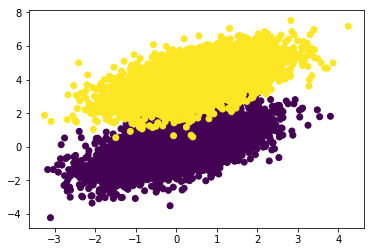

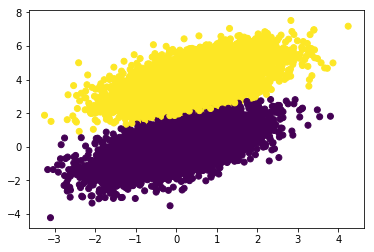

In [10]:
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_pred_round);

In [11]:
from sklearn import metrics


In [12]:
metrics.confusion_matrix(y, y_pred_round)


array([[4942,   58],
       [  50, 4950]])

In [13]:
metrics.accuracy_score(y, y_pred_round,normalize=True)


0.9892

In [14]:
me.accuracy_score(y,y_pred_round,normalize=True)

0.9892

In [15]:
metrics.precision_score(y,y_pred_round)

0.9884185303514377

In [16]:
me.precision_score(y,y_pred_round)

0.9945706816810779

In [17]:
metrics.precision_recall_curve(y,y_pred_round)

(array([0.5       , 0.98841853, 1.        ]),
 array([1.  , 0.99, 0.  ]),
 array([0., 1.]))

In [18]:
metrics.classification_report(y,y_pred_round,digits=4)

'             precision    recall  f1-score   support\n\n        0.0     0.9900    0.9884    0.9892      5000\n        1.0     0.9884    0.9900    0.9892      5000\n\navg / total     0.9892    0.9892    0.9892     10000\n'

In [19]:
me.recall(y,y_pred_round)

0.9887999999999999

In [20]:
metrics.f1_score(y,y_pred_round)

0.9892086330935251

In [21]:
me.f1_measure(y,y_pred_round)

0.9916769458472652

In [22]:
metrics.recall_score(y,y_pred_round)

0.99